In [5]:
# import requiredd libraries
import pandas as pd
import numpy as np

#import data set and store it as dataframe in memory
df = pd.read_csv("NYC_Leading_Death_Causes.csv")
print("the length of the original df is", len(df))

the length of the original df is 1096


In [6]:
#[A]Handling duplicate rows*******

# Select duplicate rows except first occurrence based on all columns
dupRowsDF = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(dupRowsDF) 


### dropping ALL duplicte values except first 
df1 = df.drop_duplicates() 
print(len(df1))

### displaying data 
print("the length of the df after deleting duplicate rows is", len(df1))


Duplicate Rows except first occurrence based on all columns are :
     Year                       Leading Cause Sex      Race Ethnicity Deaths  \
32   2009  Assault (Homicide: Y87.1, X85-Y09)   M  Black Non-Hispanic    255   
149  2009  Assault (Homicide: Y87.1, X85-Y09)   M  Black Non-Hispanic    255   

    Death Rate Age Adjusted Death Rate  
32          30                      30  
149         30                      30  
1094
the length of the df after deleting duplicate rows is 1094


In [9]:
#Rename one column
df1 = df1.rename(columns = {'Sex':'Gender'}) 

In [7]:
# find the data types of all columns
df1.dtypes

Year                        int64
Leading Cause              object
Gender                     object
Race Ethnicity             object
Deaths                     object
Death Rate                 object
Age Adjusted Death Rate    object
dtype: object

In [6]:
# Find the total number of deaths in 8 years; datatype of "Deaths" column is "object"
# without converting the column to numeric, the matematical operation "sum" returns a garbage result
df1["Deaths"].sum()

'22868271140255.102262140.191281761770.102121..9018313123554845929132610746635616803222.15926271204.5168290281.6..829.229314645124448145155271163846951721464.30052811231.55510214716147.7.12631667.2951912161057.410511627221493319299.449519403366563.180747.6310361230279376185253011554..186.23522826538.297156.5714.526119313755727327581291055651570820461.29019710075.896674535219153218119113.116633627126501621486206192521065620916927722693352222.191138216517.533081824631882522721779337120081784..189371.3639221033121379519109710.2851201..1482212715.115629716250211991543938013375202625418227.228521189764317135742044340266229134111252151316558247135133048.267431422722196130590605351313217063391142831877550.36.75507215108853384951278124615950227266.320112172156145262455..5253514178792991455503155171268.14415115434383028.9882798322210399016518244415850229340155.184398358206742463528312517018689164171245951080.622134205265.952743775.4145571124964507..94718229411876.141418.43629.1540.22551163.1052

In [8]:
#replace "." with "NaN" and change datatype of "Deaths" to float
df1 = df1.replace('.', np.nan)
df1["Deaths"] = pd.to_numeric(df1["Deaths"])

In [9]:
# Finding the total number of deaths after converting the datatype of "Deaths" column into Numeric, returns correct result
df1["Deaths"].sum()

424998.0

In [10]:
# Find the unique causes of death --- find the unique labels of categorical/qualitative data in the column
causeDeath = df1["Leading Cause"].unique()
print(causeDeath)

# count of unique labels of "leading cause"
print("\n The number of unique causes of deaths are:", len(causeDeath))

['Influenza (Flu) and Pneumonia (J09-J18)'
 'Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)'
 'Cerebrovascular Disease (Stroke: I60-I69)'
 'Assault (Homicide: Y87.1, X85-Y09)'
 'Mental and Behavioral Disorders due to Accidental Poisoning and Other Psychoactive Substance Use (F11-F16, F18-F19, X40-X42, X44)'
 'Essential Hypertension and Renal Diseases (I10, I12)' 'All Other Causes'
 "Alzheimer's Disease (G30)"
 'Diseases of Heart (I00-I09, I11, I13, I20-I51)'
 'Intentional Self-Harm (Suicide: X60-X84, Y87.0)'
 'Human Immunodeficiency Virus Disease (HIV: B20-B24)'
 'Chronic Liver Disease and Cirrhosis (K70, K73)'
 'Malignant Neoplasms (Cancer: C00-C97)'
 'Chronic Lower Respiratory Diseases (J40-J47)'
 'Diabetes Mellitus (E10-E14)'
 'Certain Conditions originating in the Perinatal Period (P00-P96)'
 'Septicemia (A40-A41)' 'Aortic Aneurysm and Dissection (I71)'
 'Mental and Behavioral Disorders due to Use of Alcohol (F10)'
 'Insitu or Benign / Uncertain Neoplasms (D00-D48

In [11]:
#FIND THE TOTAL NUMBER OF DEATHS.................using "groupby" function
#By year
totalDeaths_year = df1.groupby("Year")["Deaths"].sum()
print("The total number of deaths every year:\n", totalDeaths_year)

#By Gender
totalDeaths_gender = df1.groupby("Gender")["Deaths"].sum()
print("\n The total number of deaths of males and females are:\n", totalDeaths_gender)

The total number of deaths every year:
 Year
2007    53996.0
2008    54138.0
2009    52820.0
2010    52505.0
2011    52726.0
2012    52420.0
2013    53387.0
2014    53006.0
Name: Deaths, dtype: float64

 The total number of deaths of males and females are:
 Gender
F    217071.0
M    207927.0
Name: Deaths, dtype: float64


The total number of deaths by Ethnicity:
 Race Ethnicity
White Non-Hispanic            206487.0
Black Non-Hispanic            111116.0
Hispanic                       74802.0
Asian and Pacific Islander     26355.0
Not Stated/Unknown              4099.0
Other Race/ Ethnicity           2139.0
Name: Deaths, dtype: float64


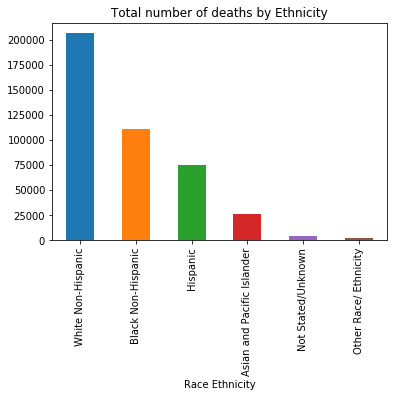

In [27]:
#FIND THE TOTAL NUMBER OF DEATHS.................
#By Race Ethnicity and sort the answers in descending order
totalDeaths_Race = df1.groupby("Race Ethnicity")["Deaths"].sum().sort_values(ascending=False)
print("The total number of deaths by Ethnicity:\n", totalDeaths_Race)

# Make a bar diagram for the total deaths by Race
totalDeaths_Race.plot.bar(title = "Total number of deaths by Ethnicity")

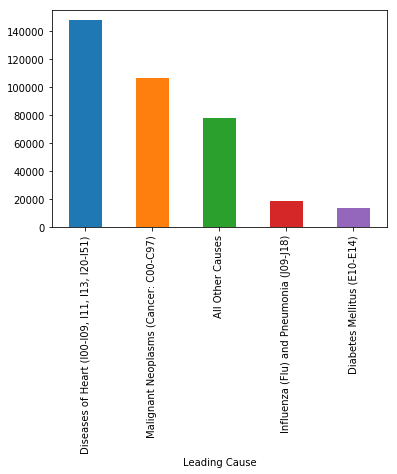

In [13]:
#FIND THE TOTAL NUMBER OF DEATHS.................
# By Leading Cause of Death and write the answer in seperate file "Death_LC.csv". Find only top 5 causes

totalDeaths_LC = df1.groupby("Leading Cause")["Deaths"].sum().sort_values(ascending=False).head()
totalDeaths_LC.to_csv("Deaths_LC.csv") # write the result in another file
totalDeaths_LC.plot.bar()

In [25]:
#FIND THE MAX/MIN NUMBER OF DEATHS.................Using "agg" function

#*****By year
year_maxmin = df1.groupby('Year').agg({'Deaths': [ 'min', 'max']})

#*****By Gender
gender_maxmin = df1.groupby('Gender').agg({'Deaths': ['min', 'max']})

#*****Leading Cause
lc_maxmin = df1.groupby('Leading Cause').agg({'Deaths': ['min', 'max']})

#*****Race Ethnicity
race_maxmin = df1.groupby('Race Ethnicity').agg({'Deaths': ['min', 'max']})


In [26]:
print("The maximum and minimum number of deaths by year are: \n", year_maxmin)
print("\n\nThe maximum and minimum number of deaths by gender are: \n", gender_maxmin)
print("\n\nThe maximum and minimum number of deaths by leading cause are: \n", lc_maxmin)
print("\n\nThe maximum and minimum number of deaths by race are: \n", race_maxmin)

The maximum and minimum number of deaths by year are: 
      Deaths        
        min     max
Year               
2007    5.0  7050.0
2008    5.0  6836.0
2009    5.0  6297.0
2010    5.0  5351.0
2011    5.0  5016.0
2012    5.0  4719.0
2013    5.0  4535.0
2014    5.0  4507.0


The maximum and minimum number of deaths by gender are: 
        Deaths        
          min     max
Gender               
F         5.0  7050.0
M         5.0  5632.0


The maximum and minimum number of deaths by leading cause are: 
                                                    Deaths        
                                                      min     max
Leading Cause                                                    
Accidents Except Drug Posioning (V01-X39, X43, ...    5.0   297.0
All Other Causes                                      8.0  2595.0
Alzheimer's Disease (G30)                             8.0   276.0
Aortic Aneurysm and Dissection (I71)                  NaN     NaN
Assault (Homicide: Y87.1,

In [36]:
#Number of deaths every year by Gender.......
total_lc_gender = df1.groupby(["Year","Gender"])["Deaths"].sum()

print(total_lc_gender)

Year  Gender
2007  F         27749.0
      M         26247.0
2008  F         27816.0
      M         26322.0
2009  F         26941.0
      M         25879.0
2010  F         26675.0
      M         25830.0
2011  F         27075.0
      M         25651.0
2012  F         26766.0
      M         25654.0
2013  F         27133.0
      M         26254.0
2014  F         26916.0
      M         26090.0
Name: Deaths, dtype: float64


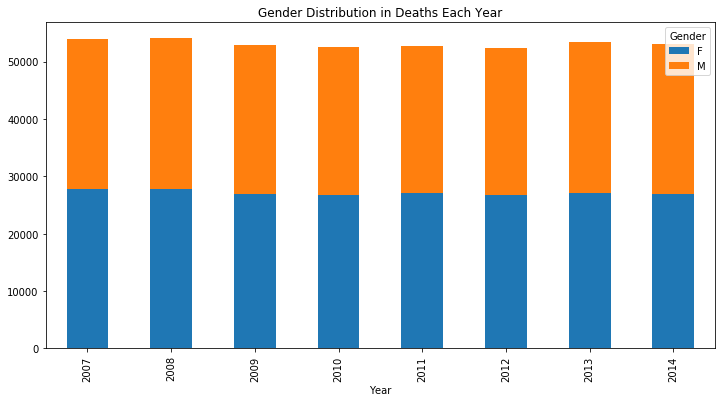

In [39]:
# Draw a stacked bar graph of each year showing Male/female proportion in total deaths
df2 = df1.groupby(['Year', 'Gender'])['Deaths'].sum().unstack('Gender')
df2[['F','M']].plot(kind='bar', stacked=True, title = "Gender Distribution in Deaths Each Year", figsize=(12,6))

In [41]:
df2

Gender,F,M
Year,,
2007,27749.0,26247.0
2008,27816.0,26322.0
2009,26941.0,25879.0
2010,26675.0,25830.0
2011,27075.0,25651.0
2012,26766.0,25654.0
2013,27133.0,26254.0
2014,26916.0,26090.0


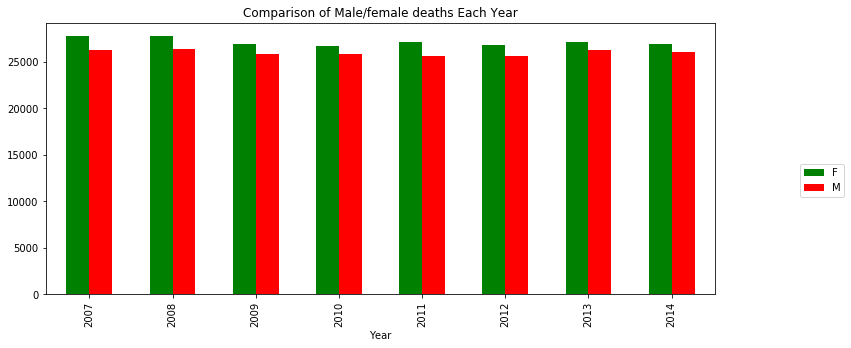

In [61]:
# Draw a GROUPED bar graph of each year showing the comparison of Male/female deaths each year
# width = .55 ------  sets the width of the bars 
# legend = False ---  Turns the Legend off
# figsize ----------  Sets size of plot in inches
# legend(bbox_to_anchor = (....)) --------- sets the position of the legend
df2.plot.bar(title = "Comparison of Male/female deaths Each Year", width=0.55, figsize=(12,5),color=["green","red"]).legend(bbox_to_anchor=(1.2, 0.5))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000211041D15F8>,
      dtype=object)

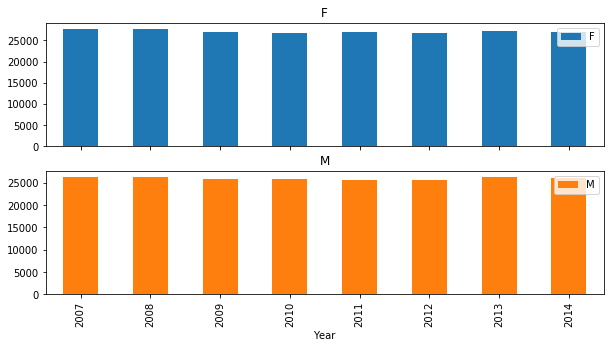

In [62]:
df2.plot.bar(subplots = True, figsize=(10,5) )

In [40]:
#dropping all rows with NaN in ANY column --- CAN BE A WRONG APPROACH FOR THIS DATASET
df1 = df1.dropna()

print("The length of df1 after dropping all rows that have NaN in ANY column is:", len(df1))

df1["Deaths"].sum()

The length of df1 after dropping all rows that have NaN in ANY column is: 708


418760.0

In [10]:
#find the data related to 2010....
df1_2010 = df1[df1.Year == 2010]

In [11]:
df1_2010

,Year,Leading Cause,Gender,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2010,Influenza (Flu) and Pneumonia (J09-J18),F,Hispanic,228,18.7,23.1
3,2010,Cerebrovascular Disease (Stroke: I60-I69),M,Hispanic,140,12.3,21.4
8,2010,All Other Causes,F,White Non-Hispanic,2140,149.7,93.9
28,2010,All Other Causes,F,Black Non-Hispanic,1326,126.5,117.4
37,2010,Chronic Lower Respiratory Diseases (J40-J47),F,Not Stated/Unknown,6,.,.
40,2010,Cerebrovascular Disease (Stroke: I60-I69),M,Other Race/ Ethnicity,.,.,.
59,2010,"Accidents Except Drug Posioning (V01-X39, X43,...",M,White Non-Hispanic,271,20.2,18.4
60,2010,"Accidents Except Drug Posioning (V01-X39, X43,...",F,White Non-Hispanic,163,11.4,7.8
62,2010,Malignant Neoplasms (Cancer: C00-C97),M,Not Stated/Unknown,46,.,.
87,2010,Malignant Neoplasms (Cancer: C00-C97),M,Hispanic,1057,92.5,150
